# Age Interpolation for Particles with No Thermal History
ASPECT models frequently add and remove particles during a model run to maintain a certain particle density in different parts of the model. This means that new particles will not have any previous thermal history when added. GDTchron by default interpolates the age and thermal history of these particles using their nearest neighbors when they are added, but this feature has to potential to introduce error and can be turned off. When turned off, all new particles introduced during a model run will show no data for a given thermochronometric system for all timesteps in which they appear.

This notebook uses results from `process_riftinversion.ipynb` to show differences in results in a small portion of a rift inversion model when interpolation is turned on and off in GDTchron. Like the other rift inversion notebooks, this cannot be reproduced directly without access to large local source files and is intended as an example demonstration only.

In [1]:
# Imports
import cmcrameri.cm as cmc
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pyvista as pv
from matplotlib.lines import Line2D

import gdtchron as gdt

plt.rcParams['pdf.fonttype'] = 42

The cell below gets the meshes for the relevant files and sets some plotting parameters

In [ ]:
file_nointerp = 'meshes_ahe_nointerp/meshes_ahe_nointerp_360.vtu'
file_interp = 'meshes_tchron/meshes_tchron_360.vtu'

mesh_nointerp = pv.read(file_nointerp)
mesh_nointerp.points /= 1e3  # Convert m to km
# Convert Y position to depth
mesh_nointerp.points[:, 1] = -(mesh_nointerp.points[:, 1] - 600)  

mesh_interp = pv.read(file_interp)
mesh_interp.points /= 1e3  # Convert m to km
# Convert Y position to depth
mesh_interp.points[:, 1] = -(mesh_interp.points[:, 1] - 600)  

field = 'AHe'
cmap = cmc.lapaz_r
bounds = [550, 554, -2, 2]  # km, X position and depth
bar = False
clim = (0, 2)  # Ma
point_size = 20

The cell below makes the comparison plot

2025-11-19 21:26:33.737 (   1.767s) [    7A993AB8E740]vtkXOpenGLRenderWindow.:1458  WARN| bad X server connection. DISPLAY=
/tmp/ipykernel_680/782270893.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


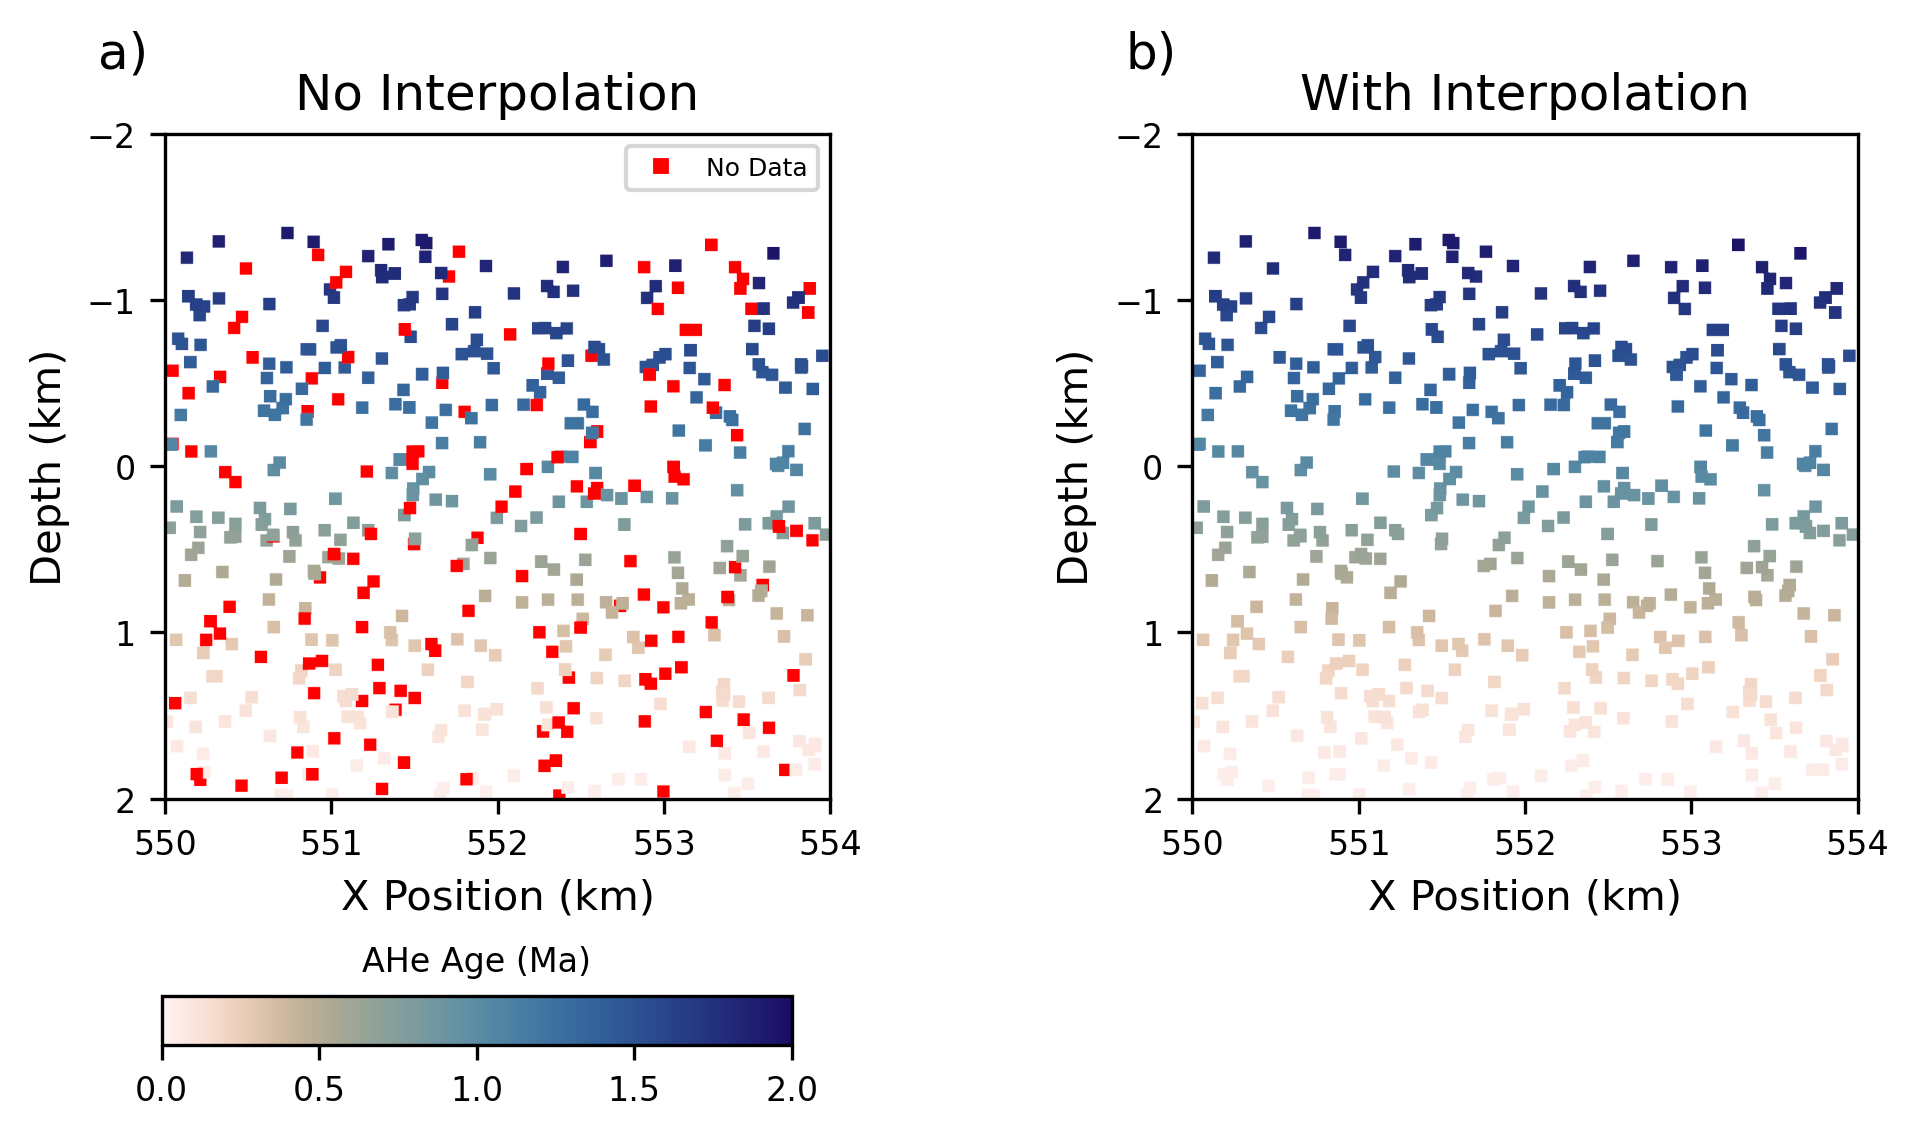

In [3]:
fig, axs = plt.subplots(1, 2, dpi=300, figsize=(7, 3.25))

gdt.plot_vtk_2d(mesh_nointerp, field=field, bounds=bounds, ax=axs[0],
              cmap=cmap, colorbar=bar, clim=clim, point_size=point_size, 
              nan_color='red')

gdt.plot_vtk_2d(mesh_interp, field=field, bounds=bounds, ax=axs[1],
              cmap=cmap, colorbar=bar, clim=clim, point_size=point_size)

for k, ax in enumerate(axs):
    ax.set_xlabel('X Position (km)')
    ax.set_ylabel('Depth (km)')
    ax.invert_yaxis()
    ax.set_yticks([2, 1, 0, -1, -2])  # km, depth
    ax.annotate(chr(97 + k) + ')', (-0.1, 1.1), xycoords='axes fraction', fontsize=12)
    ax.tick_params(labelsize=8)

cax = fig.add_axes([0.12, -0.09, 0.3, 0.05])
norm = mcolors.Normalize(vmin=clim[0], vmax=clim[1])
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm, cax=cax, orientation='horizontal')
cax.set_title('AHe Age (Ma)', fontsize=8)
cax.tick_params(labelsize=8)

no_data_patch = Line2D(
    [0], [0], marker='s', color='w', markerfacecolor='red',
    markersize=5, label='No Data'
    )

axs[0].legend(handles=[no_data_patch], fontsize=6)

axs[0].set_title('No Interpolation')
axs[1].set_title('With Interpolation')

plt.tight_layout()
fig.savefig('interpolation.pdf', bbox_inches='tight')